In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc("font", family="AppleGothic")
plt.rc('axes', unicode_minus=False)

In [5]:
df = pd.read_csv('./data/WA_Fn-UseC_-HR-Employee-Attrition.csv')

#### 결측치 검토

In [7]:
# 모든 column이 결측치를 보유하지 않음
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

#### 유의미한 시각화

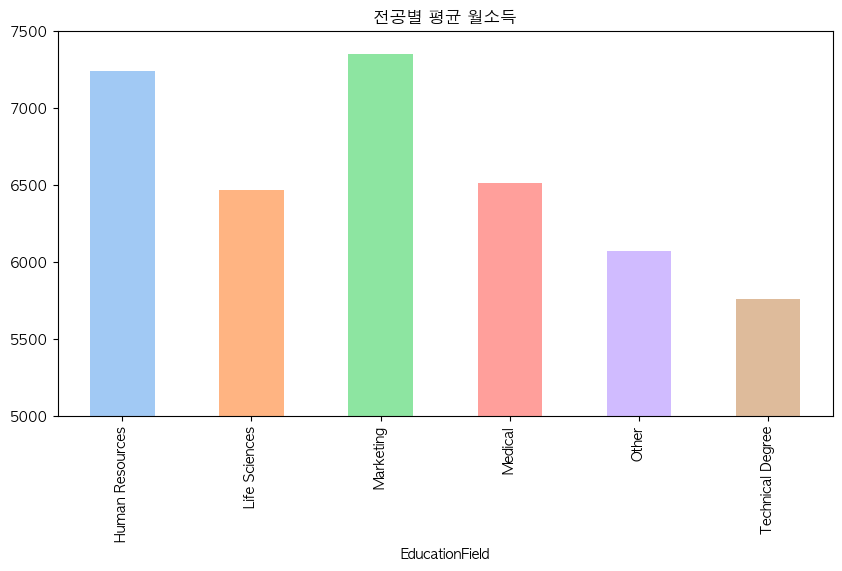

In [53]:
# 전공별 평균 월소득
df.groupby("EducationField")["MonthlyIncome"].mean().plot.bar(figsize=(10,5), color=sns.color_palette('pastel'))
plt.title('전공별 평균 월소득')
plt.ylim(5000, 7500)
plt.show()

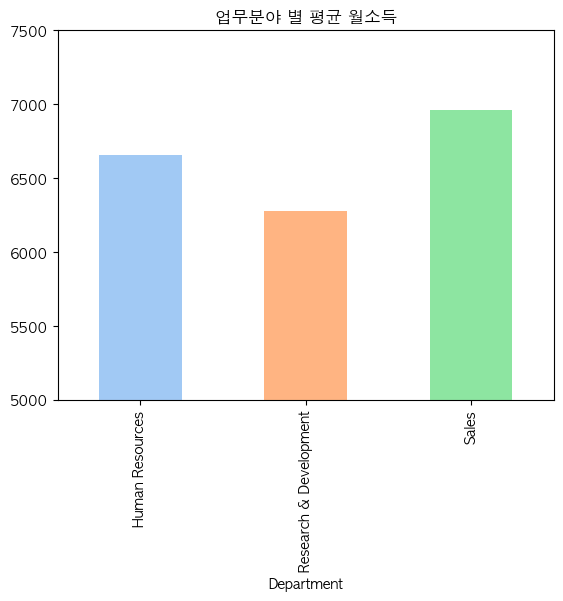

In [63]:
# 업무분야 별 평균 월소득
df.groupby("Department")["MonthlyIncome"].mean().plot.bar(color=sns.color_palette('pastel'))
plt.title('업무분야 별 평균 월소득')
plt.ylim(5000, 7500)
plt.show()

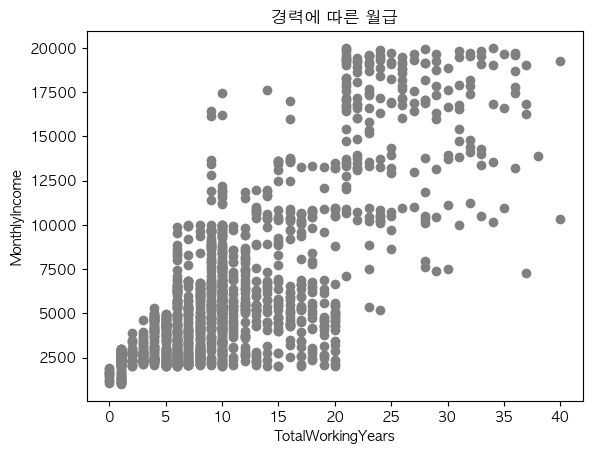

In [73]:
# 경력에 따른 월급 정도
plt.scatter(df.TotalWorkingYears, df.MonthlyIncome, color='gray')
plt.title('경력에 따른 월급')
plt.xlabel('TotalWorkingYears')
plt.ylabel('MonthlyIncome')
plt.show()

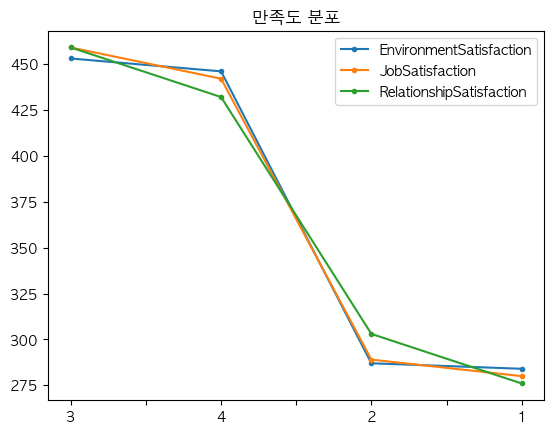

In [96]:
# 만족도 분포
df.EnvironmentSatisfaction = df.EnvironmentSatisfaction.astype('category')
df.JobSatisfaction = df.JobSatisfaction.astype('category')
df.RelationshipSatisfaction = df.RelationshipSatisfaction.astype('category')

df.EnvironmentSatisfaction.value_counts().plot(marker='.', label='EnvironmentSatisfaction')
df.JobSatisfaction.value_counts().plot(marker='.', label='JobSatisfaction')
df.RelationshipSatisfaction.value_counts().plot(marker='.', label='RelationshipSatisfaction')
plt.title('만족도 분포')
plt.legend()
plt.show()

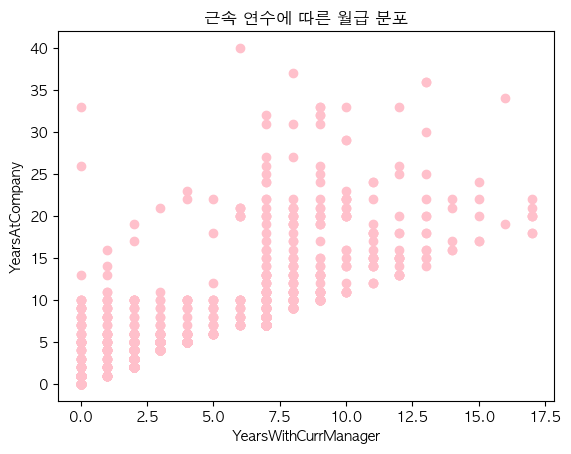

In [102]:
# 근속 연수에 따른 월급 분포
plt.scatter(df.YearsWithCurrManager, df.YearsAtCompany, color='pink')
plt.title('근속 연수에 따른 월급 분포')
plt.xlabel('YearsWithCurrManager')
plt.ylabel('YearsAtCompany')
plt.show()

#### 이상치 탐색

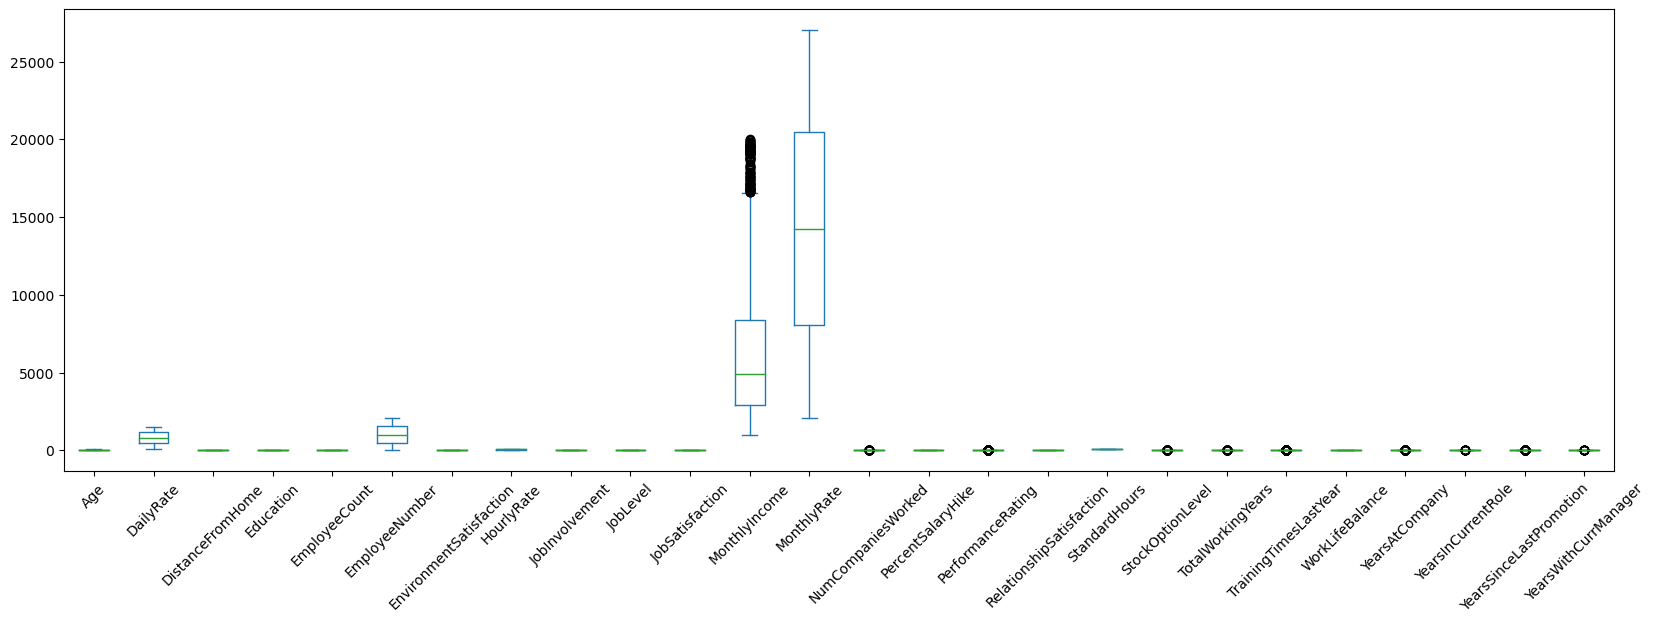

In [21]:
# 이상치 존재하는 column:
## JobSatisfaction, NumCompaniesWorked, PerformanceRating, StockOptionLevel, TotalWorkingYears
## TrainingTimesLastYear, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager
numeric_cols = df.columns[df.dtypes != object]
df[numeric_cols].plot.box(figsize=(20,6))
plt.xticks(rotation=45)
plt.show()

#### 수치형 변수 간 상관관계 파악

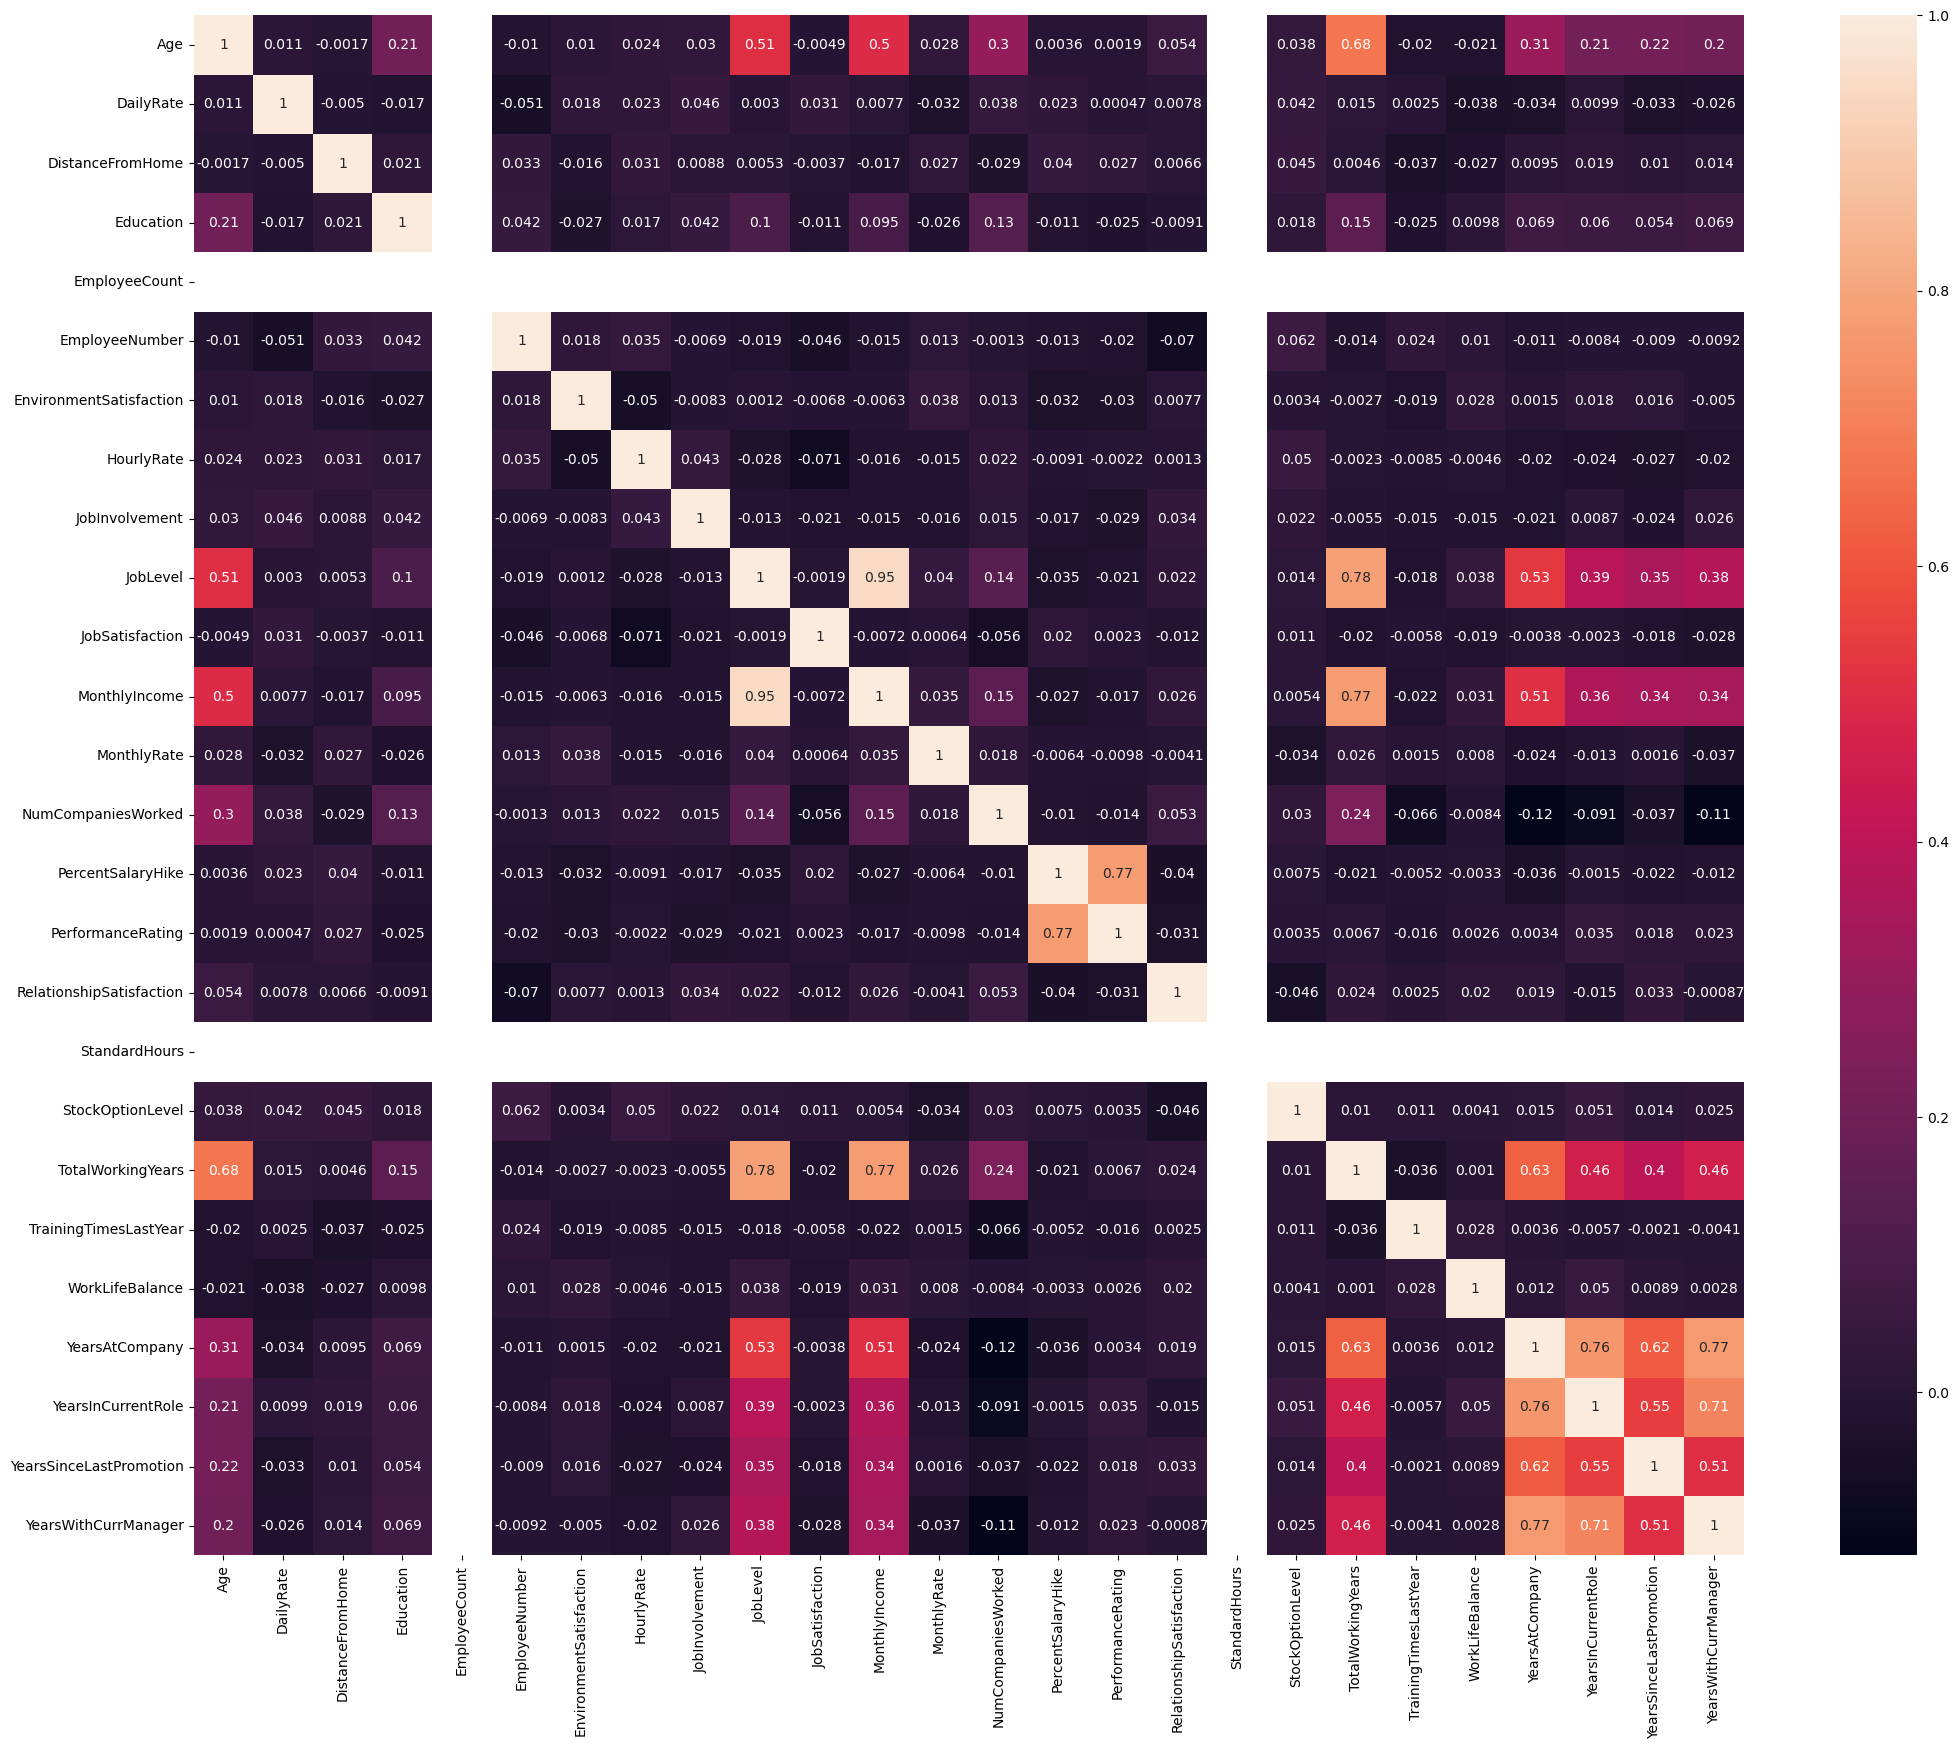

In [34]:
# EmployeeCount와 StandardHours는 다른 열들과 모두 상관관계가 1이다.
## MonthlyIncome과 JobLevel의 상관관계가 그 다음으로 높다
plt.figure(figsize=(25,20))
sns.heatmap(df[numeric_cols].corr(), annot=True)
plt.show()

In [35]:
df.EmployeeCount.value_counts()

1    1470
Name: EmployeeCount, dtype: int64

In [36]:
df.StandardHours.value_counts()

80    1470
Name: StandardHours, dtype: int64

#### 파생변수 생성

In [40]:
# 인생을 회사 근무에 소비한 비율
df['YearsAtCompany/Age'] = df.YearsAtCompany/df.Age
display(df['YearsAtCompany/Age'])

0       0.146341
1       0.204082
2       0.000000
3       0.242424
4       0.074074
          ...   
1465    0.138889
1466    0.179487
1467    0.222222
1468    0.183673
1469    0.117647
Name: YearsAtCompany/Age, Length: 1470, dtype: float64